### 의사결정 나무 (결정트리)

- 분류 기법 적용에서 가장 많이 사용하는 방법
- 분류 작업을 수행하기 위해 한번에 한 특성 변수씩 해석 
- 결정 트리 모델을 사용하면 동작을 설명하기 수월함
- 예) 대출 거부 사유, 신용도가 낮은 이유, 불합격 사유 등


- 선형회귀 모델은 특성들을 대상으로 곱셈과 덧셈과 같은 연산을 하고 그 값을 기준으로 회귀나 분류를 예측했다. 
- 결정 트리(decision tree)는 이와 달리 각 특성을 독립적으로 하나씩 검토하여 분류 작업을 수행한다. 
- 마치 스무고개 하여 예측을 하듯이 동작 한 번에 한 특성을 따져보는 방법이다. 

- 하지만 결정 트리는 주로 분류와 회귀에 모두 사용된다. 
- 예를 들어 분류용 모델은 DecisionTreeClassifier가 있고 회귀분석 모델로는 DecisionTreeRegressor가 제공된다. 


In [3]:
%matplotlib inline
import mglearn
import sklearn
from preamble import *

In [4]:
!pip install graphviz

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
import graphviz

### 결정 트리 만들기

- 아래는 two_moon 데이터에 대해서 결정트리를 만드는 과정을 보여준다

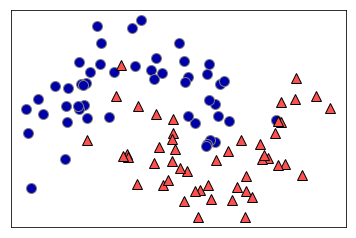

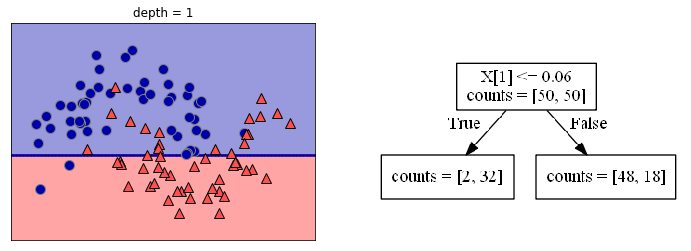

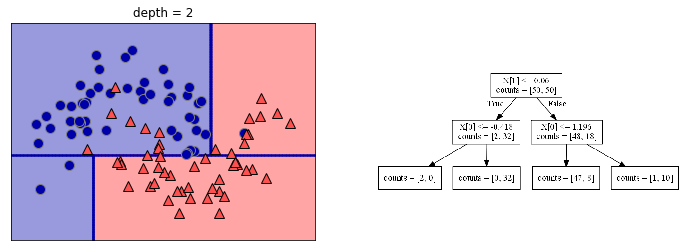

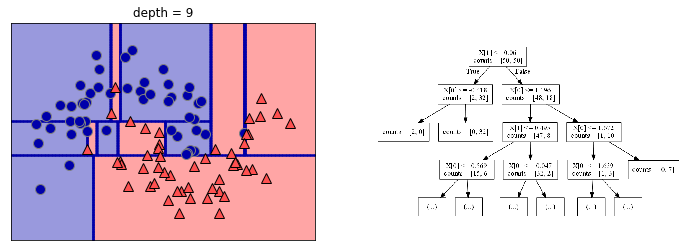

In [6]:
mglearn.plots.plot_tree_progressive()

- 위의 예에서는 한번에 하나의 특성만 조사하므로 나누는 선이 축에 수평인 것만 나타나있다
- 루트 노드: 첫번째 노드
- 순수 노드: 타깃 하나로만 이루어진 리프 노드

- 모든 리프가 순수노드가 될때까지 진행하면? 복잡해지고 과대적합됨
- 순수 노드만으로만 이루어진 트리는 훈련데이터를 100% 정확히 맞춤(일반화 낮음)

#### 회귀분석에 사용
- 새로운 데이터 포인트에 해당하는 리프 노드를 찾은 후, 이 노드의 훈련데의 평균 값이 이 데이터 포인트의 출력이 된다

#### 결정 트리의 복잡도(과적합) 제어
- 트리를 너무 상세하게 나누면 과적합된다. 훈련데이터에 들어 있는 이상치를 모두 찾아낸다
- 노드 생성을 미리 중단하는 사전 가지치기(pre-pruning)와 트리를 만든후에 크기가 작은 노드를 삭제하는 사후 가지치기(pruning)가 있다
- sciki-learn은 사전 가지치기만 지원한다
- 사전 가지치기에서는 트리의 최대 깊이를 제한하거나, 리프의 최대 갯수를 제한하거나, 노드가 분할하기 위한 포인트의 최소의 갯수를 지정한다 (몇 개 이하면 멈춤) -> DecisionTreeRegressor와 DecisionTreeClassifier는 사전 가지치기만 지원함

### 유방암 데이터 분석


In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
#결정크리 생성및 훈련
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


### 트리의 최대 깊이를 제한
- 깊이를 4로 제한하면 테스트데이터에 대한 성능이 향상된다 (과대적합을 줄임

In [8]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


### 결정 트리 그래프 그리기
- 결정 트리 방식의 장점은 동작을 설명하기가 용이하다는 것

In [12]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [13]:
#!pip install graphviz

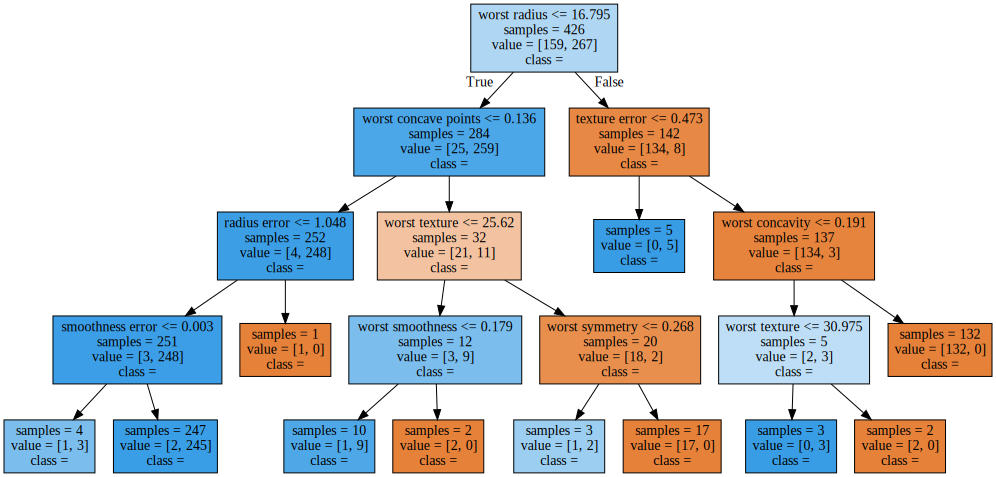

In [15]:
import graphviz

with open("tree.dot", 'rt', encoding='UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 트리의 특성 중요도
- 트리를 만드는 과정에서 각 특성이 얼마나 기여했는지를 보는 방법이 있다
- 이를 특성중요도(feature importance)라고 하며 0~1 사이의 값을 갖는다
- 0 이면 전혀 기여하지 (사용되지) 않았다는 뜻이며 전체 특성중요도의 합은 1이 된다

In [10]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


In [11]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
result = tree.feature_importances_
result

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.01 , 0.048, 0.   , 0.   , 0.002, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.727, 0.046, 0.   , 0.   , 0.014, 0.   , 0.018,
       0.122, 0.012, 0.   ])

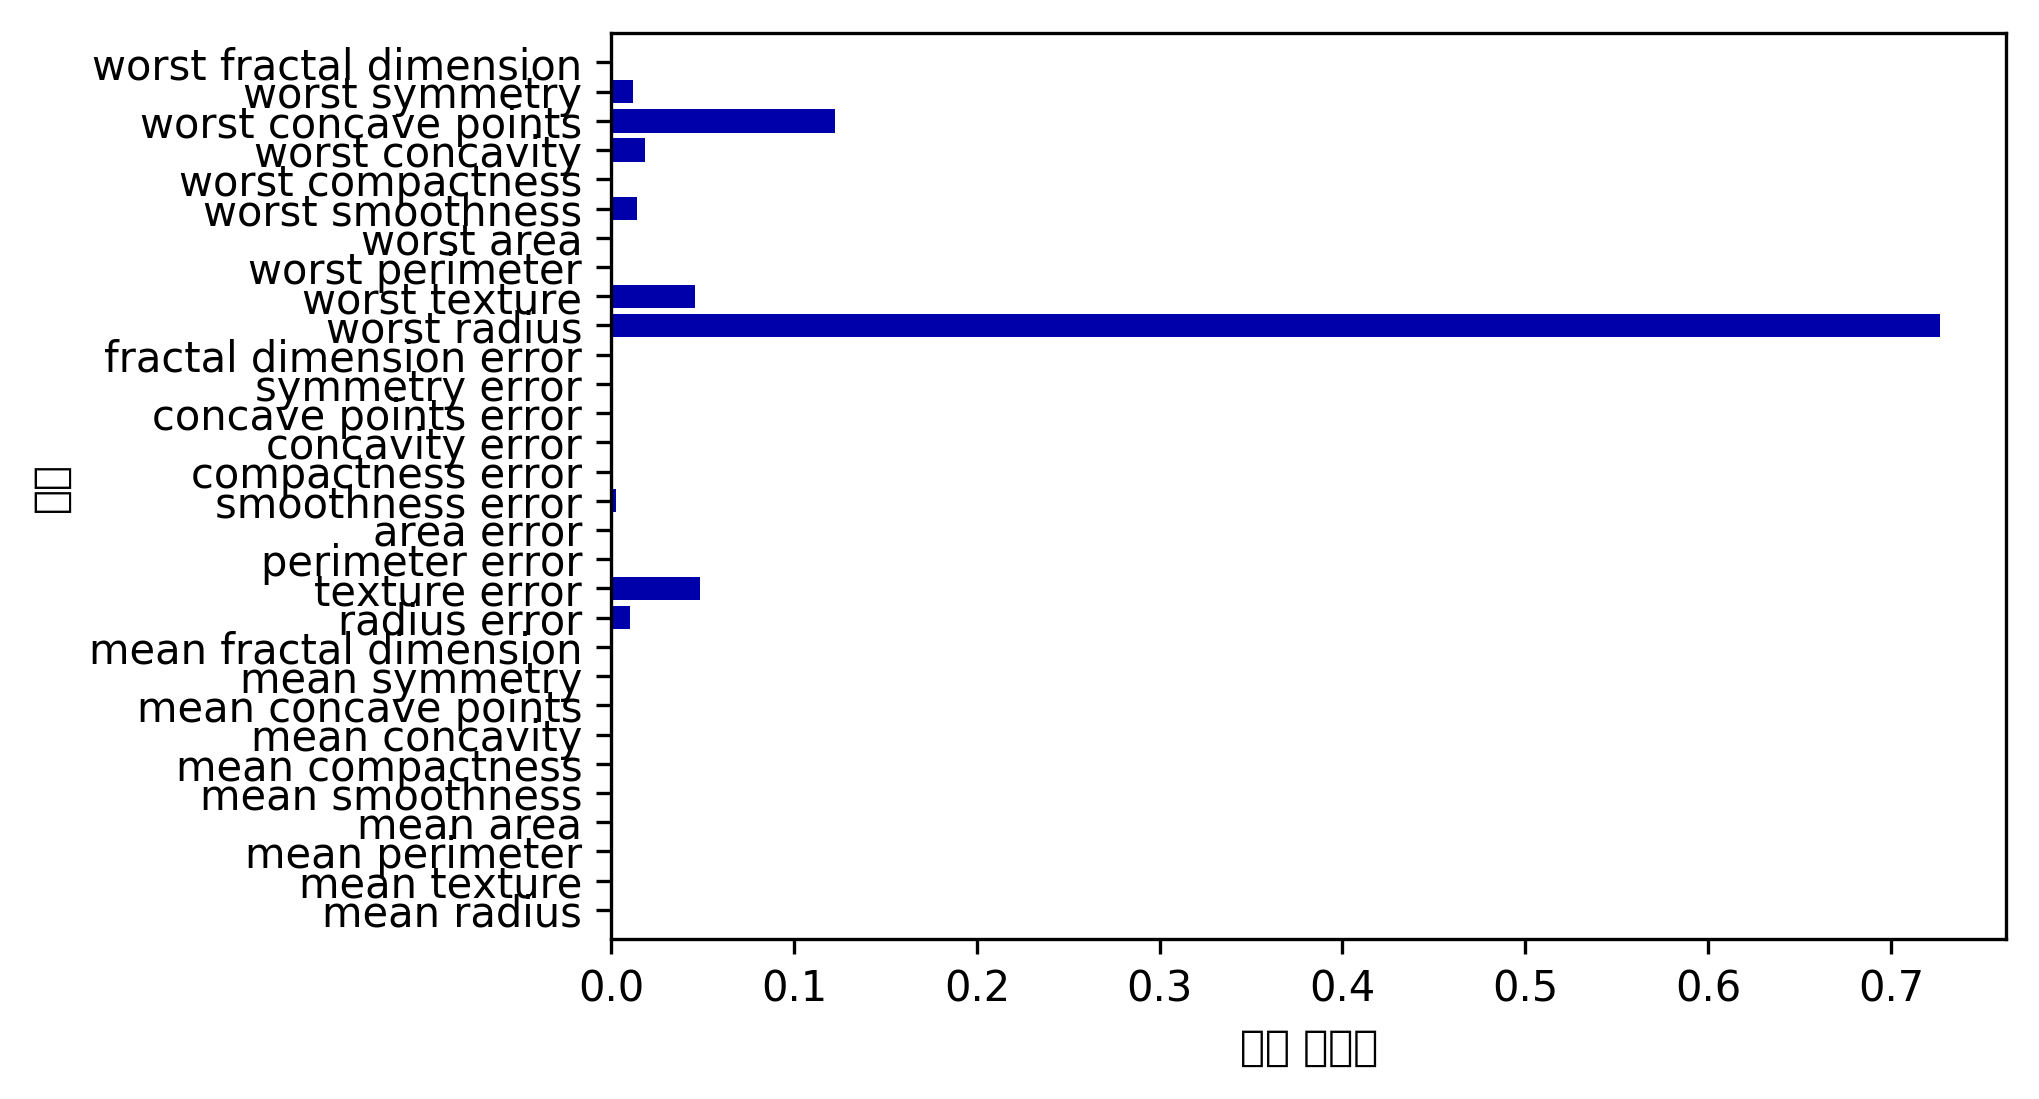

In [12]:
plot_feature_importances_cancer(tree)

In [13]:
import pandas as pd
res = pd.DataFrame(result)
res["name"] = cancer.feature_names
res

,0,name
0,0.00e+00,mean radius
1,0.00e+00,mean texture
2,0.00e+00,mean perimeter
3,0.00e+00,mean area
4,0.00e+00,mean smoothness
5,0.00e+00,mean compactness
6,0.00e+00,mean concavity
7,0.00e+00,mean concave points
8,0.00e+00,mean symmetry
9,0.00e+00,mean fractal dimension


- 위 값을 보면 worst radius의 비중이 큰 것을 알 수 있고 루트 노드에서 이 값부터 사용한 것을 알 수 있다.
- **주의할 것은 feature importance가 낮다고 하여 그 특징이 중요하지 않다는 것은 아니다. 단지 결정 트리에서 적게 사용했을 뿐이다.**
- 또한 특성중요도가 양성을 지지하는지, 악성을 지지하는지도 명확하지 않다. 단지 결정트리를 만드는데 많이 기여했다는 것을 나타낼 뿐이다.
